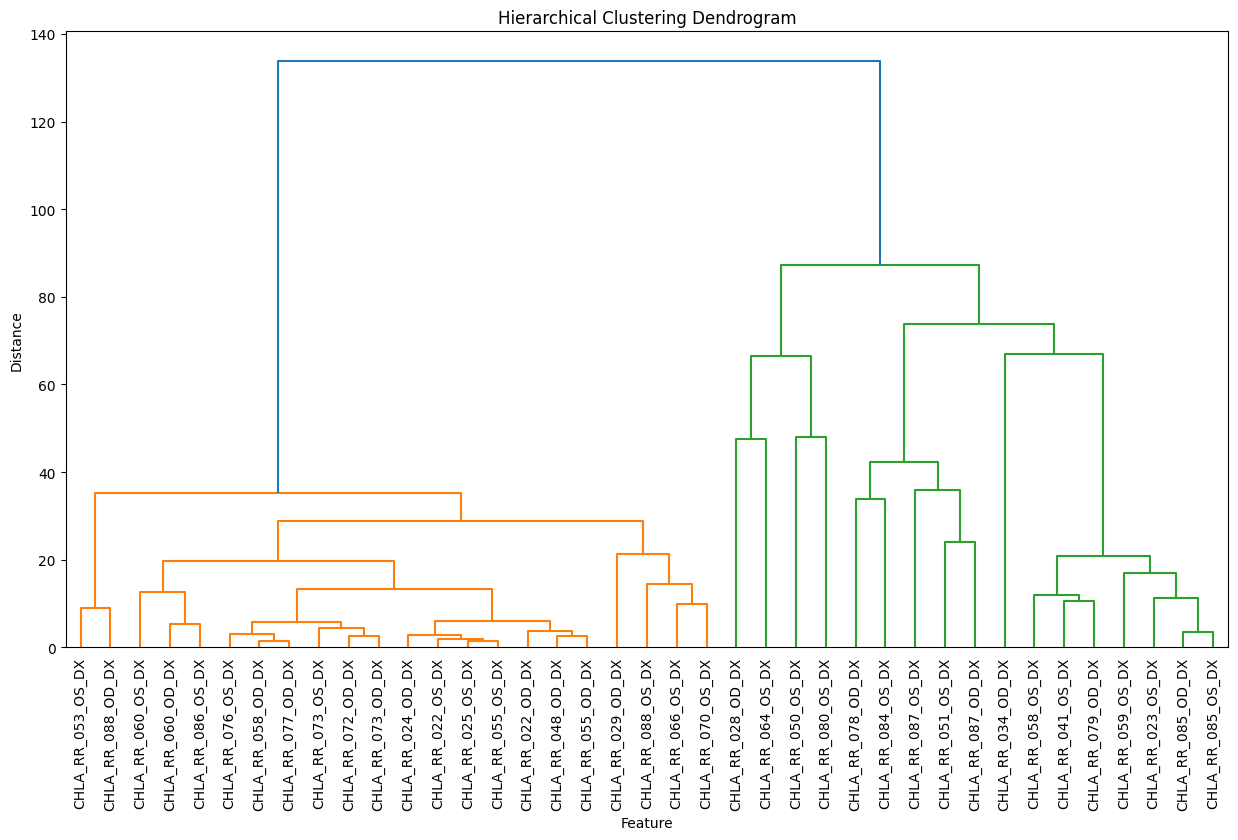

Distribution of VITREOUS SEEDING TYPES Across Hierarchical Clusters:
VITREOUS_SEEDING_TYPE  CLOUD  DUST  NONE  SPHERE
Cluster                                         
1                          1     6    11       4
2                          2     0     1       1
3                          6     2     0       5


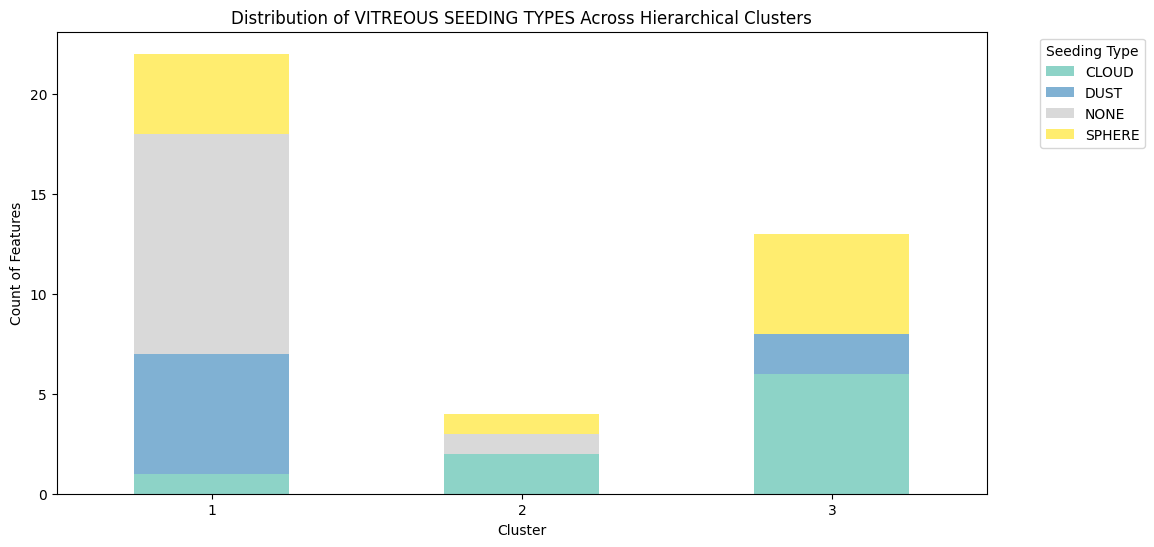

In [2]:
import pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = '/content/dx samples ratio to median rb scna (2).xlsx'  # Replace with your file path
df = pd.read_excel(file_path, header=None)

# Step 2: Extract relevant data
# Exclude the first 3 columns and map VITREOUS SEEDING TYPE AT DIAGNOSIS
seeding_types = df.iloc[0, 3:].tolist()  # Extract seeding types from Row 0, columns 3 onward
data = df.iloc[2:, 3:]                   # Extract numerical data from Rows 2 onward, columns 3 onward
data.columns = df.iloc[1, 3:].tolist()   # Assign feature IDs from Row 1 as column names
data.reset_index(drop=True, inplace=True)

# Step 3: Handle NaN values
data = data.apply(pd.to_numeric, errors='coerce')  # Ensure all values are numeric
data.fillna(data.mean(), inplace=True)            # Replace NaNs with column means

# Step 4: Normalize the data (transpose to cluster features)
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data.T)  # Transpose to cluster features

# Step 5: Perform hierarchical clustering
# Compute the linkage matrix
linkage_matrix = linkage(normalized_data, method='ward')  # Ward minimizes variance

# Step 6: Visualize the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(
    linkage_matrix,
    labels=data.columns,  # Use column names as labels
    leaf_rotation=90,
    leaf_font_size=10
)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Feature")
plt.ylabel("Distance")
plt.show()

# Step 7: Assign clusters (cut the tree)
num_clusters = 3  # Adjust based on dendrogram
clusters_hierarchical = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Step 8: Create a DataFrame for analysis
hierarchical_df = pd.DataFrame({
    "Feature": data.columns.tolist(),  # Use column names directly
    "Cluster": clusters_hierarchical,
    "VITREOUS_SEEDING_TYPE": seeding_types
})

# Step 9: Analyze the distribution of seeding types in hierarchical clusters
distribution_hierarchical = hierarchical_df.groupby(['Cluster', 'VITREOUS_SEEDING_TYPE']).size().unstack(fill_value=0)

# Step 10: Print and visualize the distribution
print("Distribution of VITREOUS SEEDING TYPES Across Hierarchical Clusters:")
print(distribution_hierarchical)

# Visualize the results
distribution_hierarchical.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="Set3")
plt.title("Distribution of VITREOUS SEEDING TYPES Across Hierarchical Clusters")
plt.xlabel("Cluster")
plt.ylabel("Count of Features")
plt.xticks(rotation=0)
plt.legend(title="Seeding Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<ipython-input-4-f55fb594029e>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=melted_data, x="Cluster", y="Value", palette="Set3")


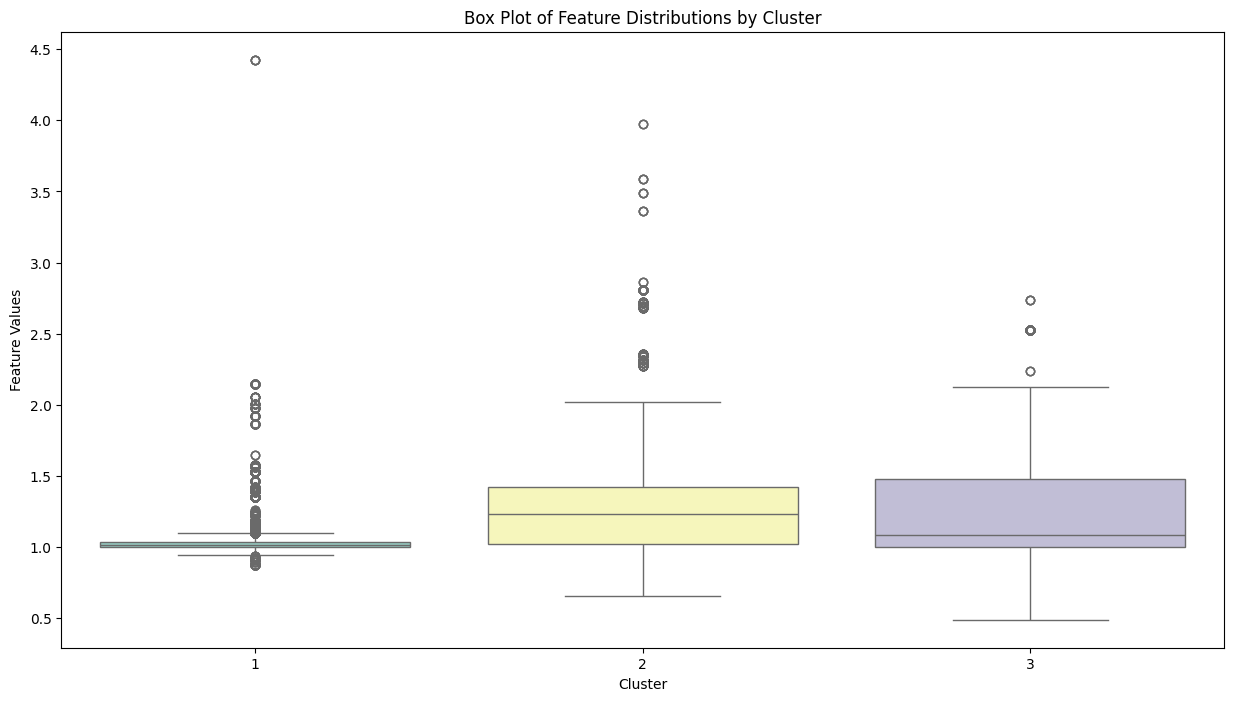

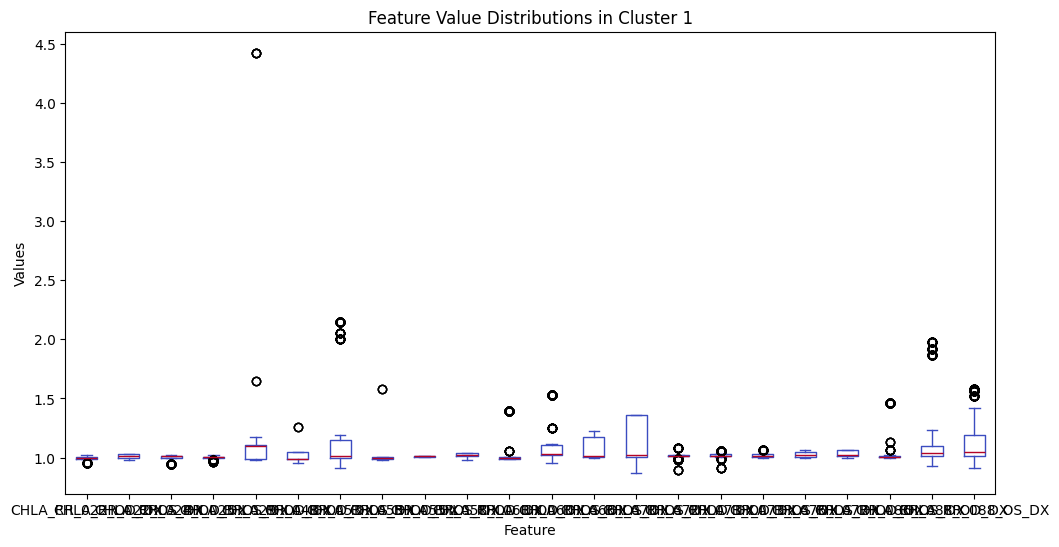

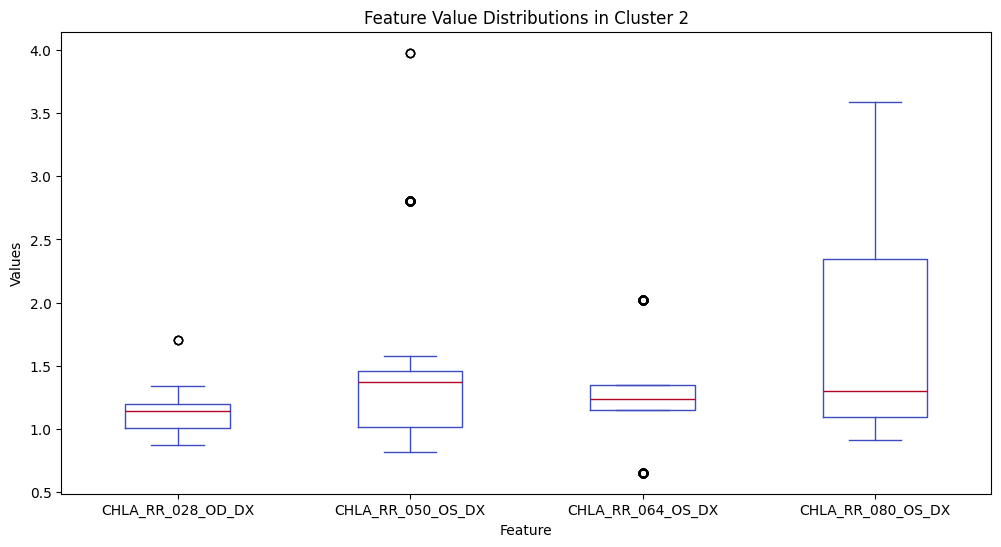

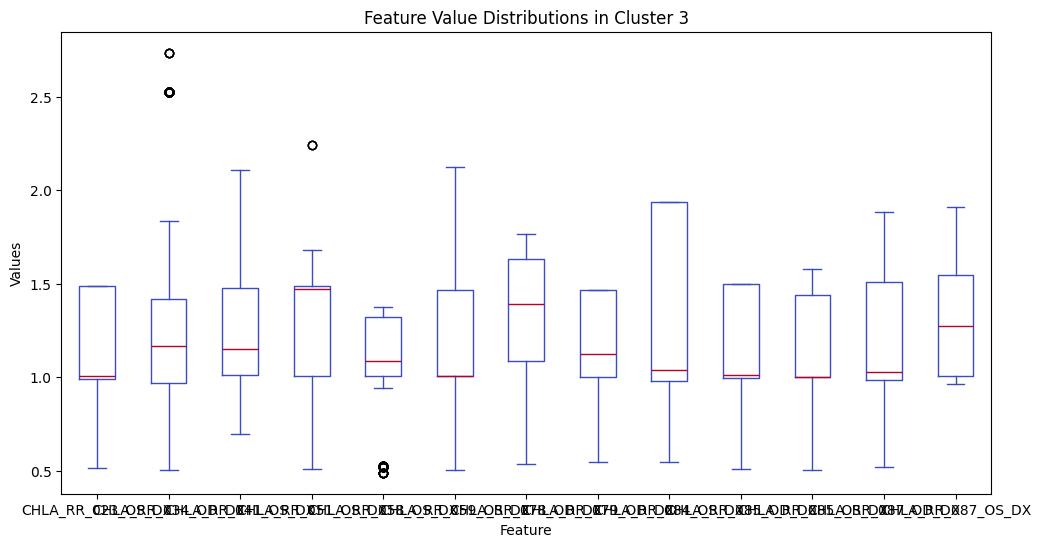

In [4]:
import seaborn as sns

# Step 1: Add the cluster assignments to the original data
cluster_map = pd.Series(clusters_hierarchical, index=data.columns, name="Cluster")
data_with_clusters = data.T.copy()  # Transpose back for feature-wise analysis
data_with_clusters["Cluster"] = cluster_map

# Step 2: Melt the data for proper plotting
melted_data = data_with_clusters.reset_index().melt(id_vars=["index", "Cluster"], var_name="Feature", value_name="Value")

# Step 3: Create box plots for feature distributions by cluster
plt.figure(figsize=(15, 8))
sns.boxplot(data=melted_data, x="Cluster", y="Value", palette="Set3")
plt.title("Box Plot of Feature Distributions by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Feature Values")
plt.xticks(rotation=0)
plt.show()

# Step 4: Individual box plots per cluster
for cluster in sorted(data_with_clusters["Cluster"].unique()):
    cluster_data = data_with_clusters[data_with_clusters["Cluster"] == cluster].drop("Cluster", axis=1).T
    cluster_data.plot(kind="box", figsize=(12, 6), colormap="coolwarm")
    plt.title(f"Feature Value Distributions in Cluster {cluster}")
    plt.xlabel("Feature")
    plt.ylabel("Values")
    plt.show()
